In [1]:
import sys
sys.path.append('/home/daniel/PycharmProjects/WageringSystem')

from Experiments.FundHistorySummary import FundHistorySummary
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from numpy import cumsum

def show_summary_grid(fund_history_summary: FundHistorySummary) -> None:
    sns.set(rc={'figure.figsize':(26,15)})
    f, axes = plt.subplots(2, 1)

    start_wealth = 100
    bet_limit_fraction = 1.0
    show_fixed_betting_wealth_progression(axes[0], fund_history_summary, start_wealth=start_wealth, betting_limit=100)
    show_dynamic_betting_wealth_progression(axes[1], fund_history_summary, start_wealth=start_wealth, bet_limit_fraction=bet_limit_fraction)

def show_fixed_betting_wealth_progression(axis, fund_history_summary: FundHistorySummary, start_wealth: float, betting_limit: float):
    snapshots = fund_history_summary.snapshots
    dates = [snapshot.date.split()[0] for snapshot in snapshots]
    absolute_payouts = [snapshot.payout_percentages * betting_limit for snapshot in snapshots]
    wealth_progression = [start_wealth + payout_sum for payout_sum in cumsum(absolute_payouts)]

    sns.lineplot(x=dates, y=wealth_progression, ax=axis)

    max_date = datetime.strptime(max(dates), '%Y-%m-%d')
    min_date = datetime.strptime(min(dates), '%Y-%m-%d')
    summary_day_interval = (max_date - min_date).days
    axis.xaxis.set_major_locator(mdates.DayLocator(interval=int(summary_day_interval / 5)))

    axis.set_title(f"Wealth progression over unseen test races. Betting limit is: {betting_limit}")
    axis.set_xlabel(f"Date")
    axis.set_ylabel(f"Current Wealth")

def show_dynamic_betting_wealth_progression(axis, fund_history_summary: FundHistorySummary, start_wealth: float, bet_limit_fraction: float) -> None:
    dates = [snapshot.date.split()[0] for snapshot in fund_history_summary.snapshots]

    current_wealth = start_wealth
    wealth_progression = []
    for i in range(len(fund_history_summary.snapshots)):
        betting_limit = current_wealth * bet_limit_fraction
        current_wealth += fund_history_summary.snapshots[i].payout_percentages * betting_limit
        wealth_progression.append(current_wealth)

    sns.lineplot(x=dates, y=wealth_progression, ax=axis)

    max_date = datetime.strptime(max(dates), '%Y-%m-%d')
    min_date = datetime.strptime(min(dates), '%Y-%m-%d')
    summary_day_interval = (max_date - min_date).days
    axis.xaxis.set_major_locator(mdates.DayLocator(interval=int(summary_day_interval / 5)))

    axis.set_title(f"Wealth progression over unseen test races. Betting limit is current wealth multiplied by {bet_limit_fraction:.2f}")
    axis.set_xlabel(f"Date")
    axis.set_ylabel(f"Current Wealth")

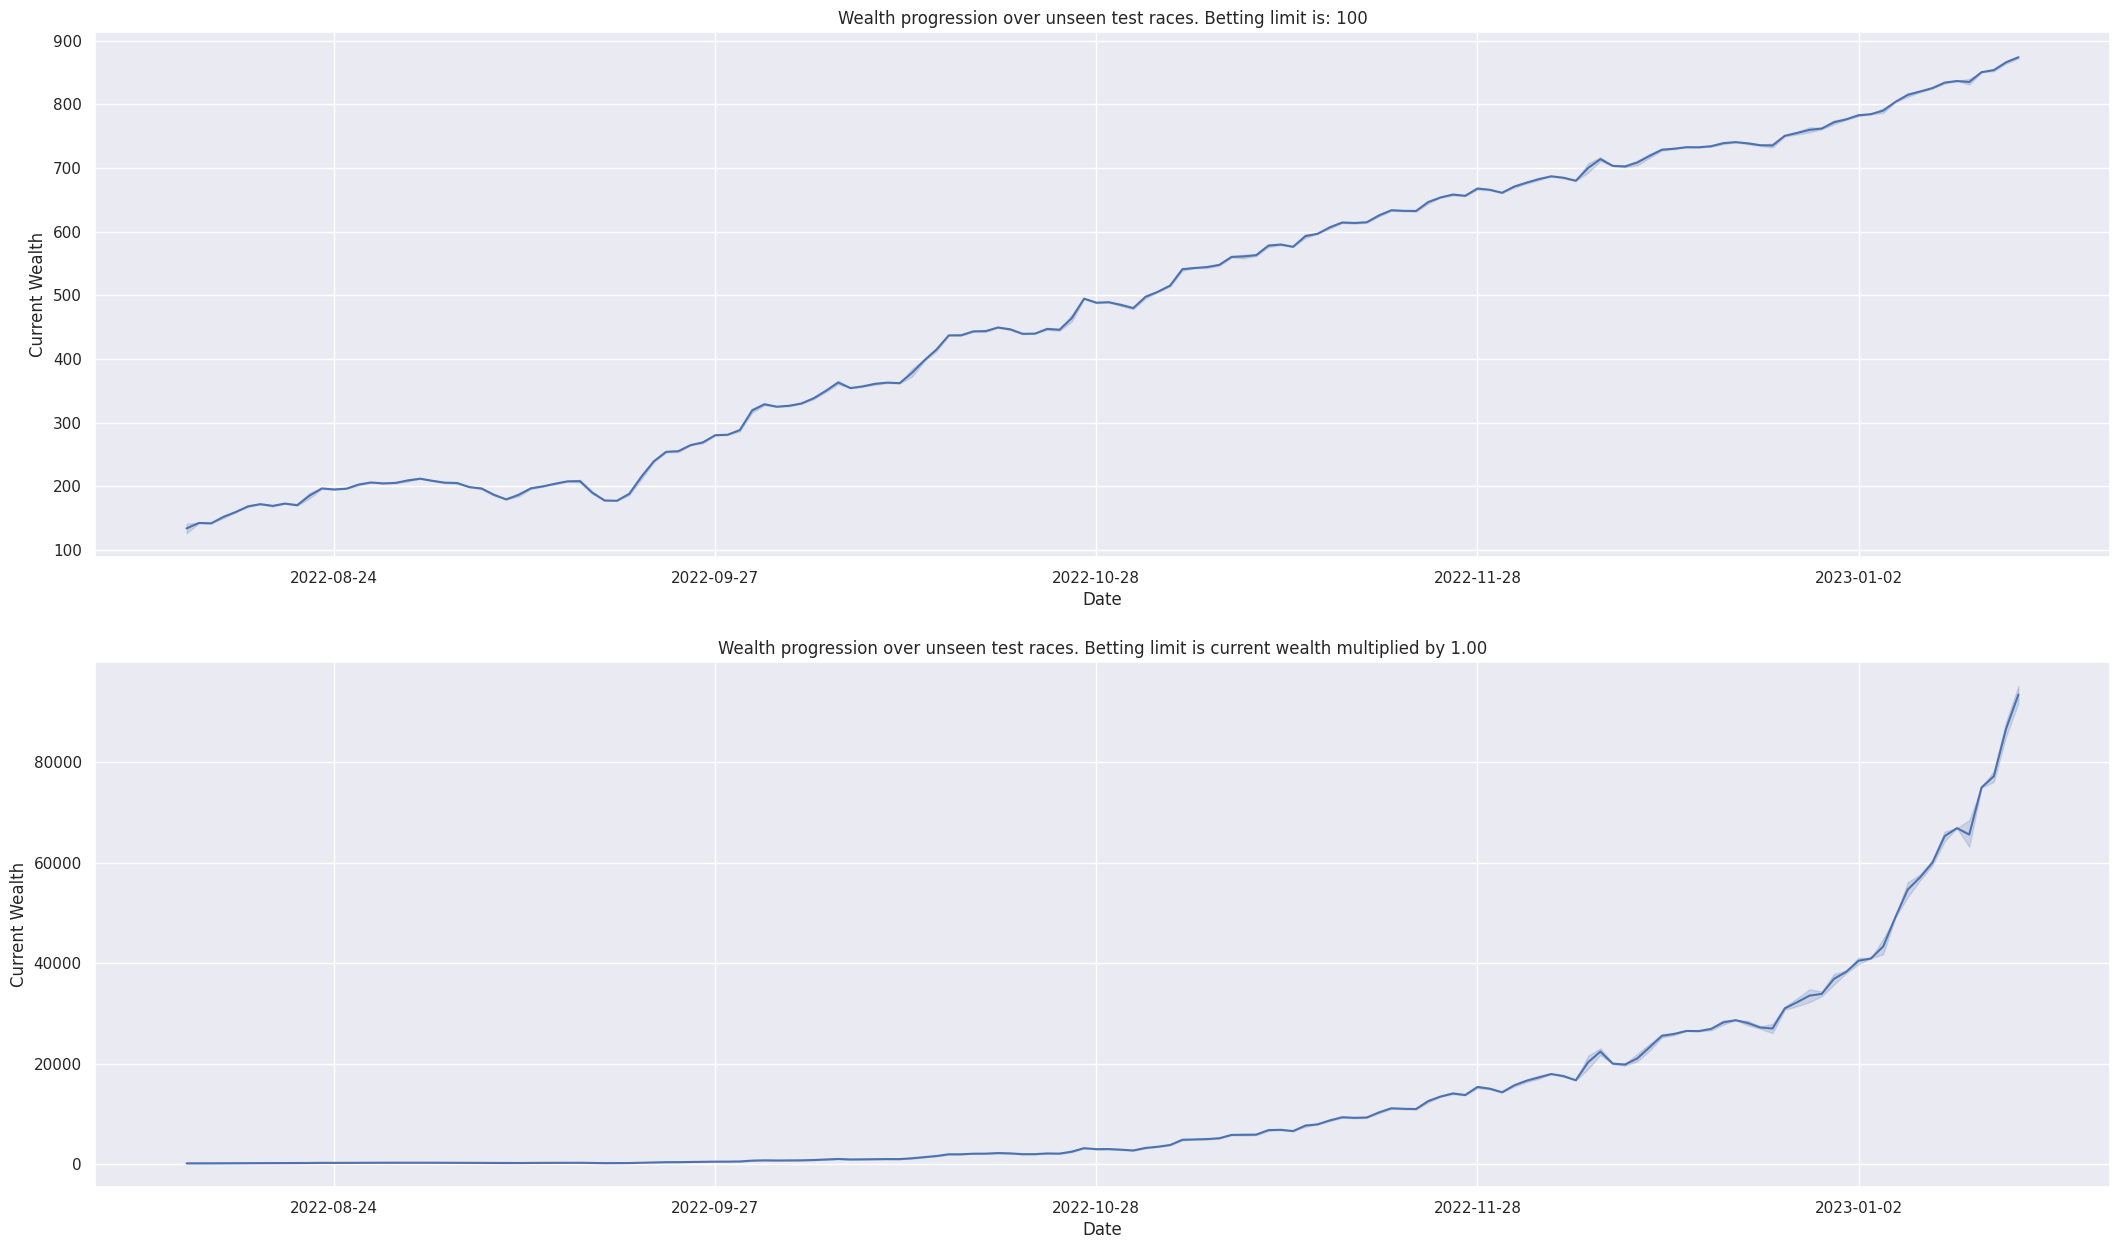

In [2]:
import pickle

FUND_HISTORY_SUMMARIES_PATH = "../data/fund_history_summaries.dat"

with open(FUND_HISTORY_SUMMARIES_PATH, "rb") as f:
    fund_history_summary = pickle.load(f)

show_summary_grid(fund_history_summary)

bet rate: 0.12879738890283707
max losses: 0.7211311845600025
min:-0.1724553674914177
max:0.4965061428436079
avg:0.001954015152120431
Average winning odds: 2.066287726358149
{0: 0.0, 3: 0.0027677037501333338, 5: 0.04614608044608225, 1: -0.0016558828614835497, 4: 0.008977452591416553, 2: -0.0026606458794782373, 6: 0.024912676527897366, 8: 0.06929605966559327, 7: 0.053587816023051335, 9: 0.12347905339693938}


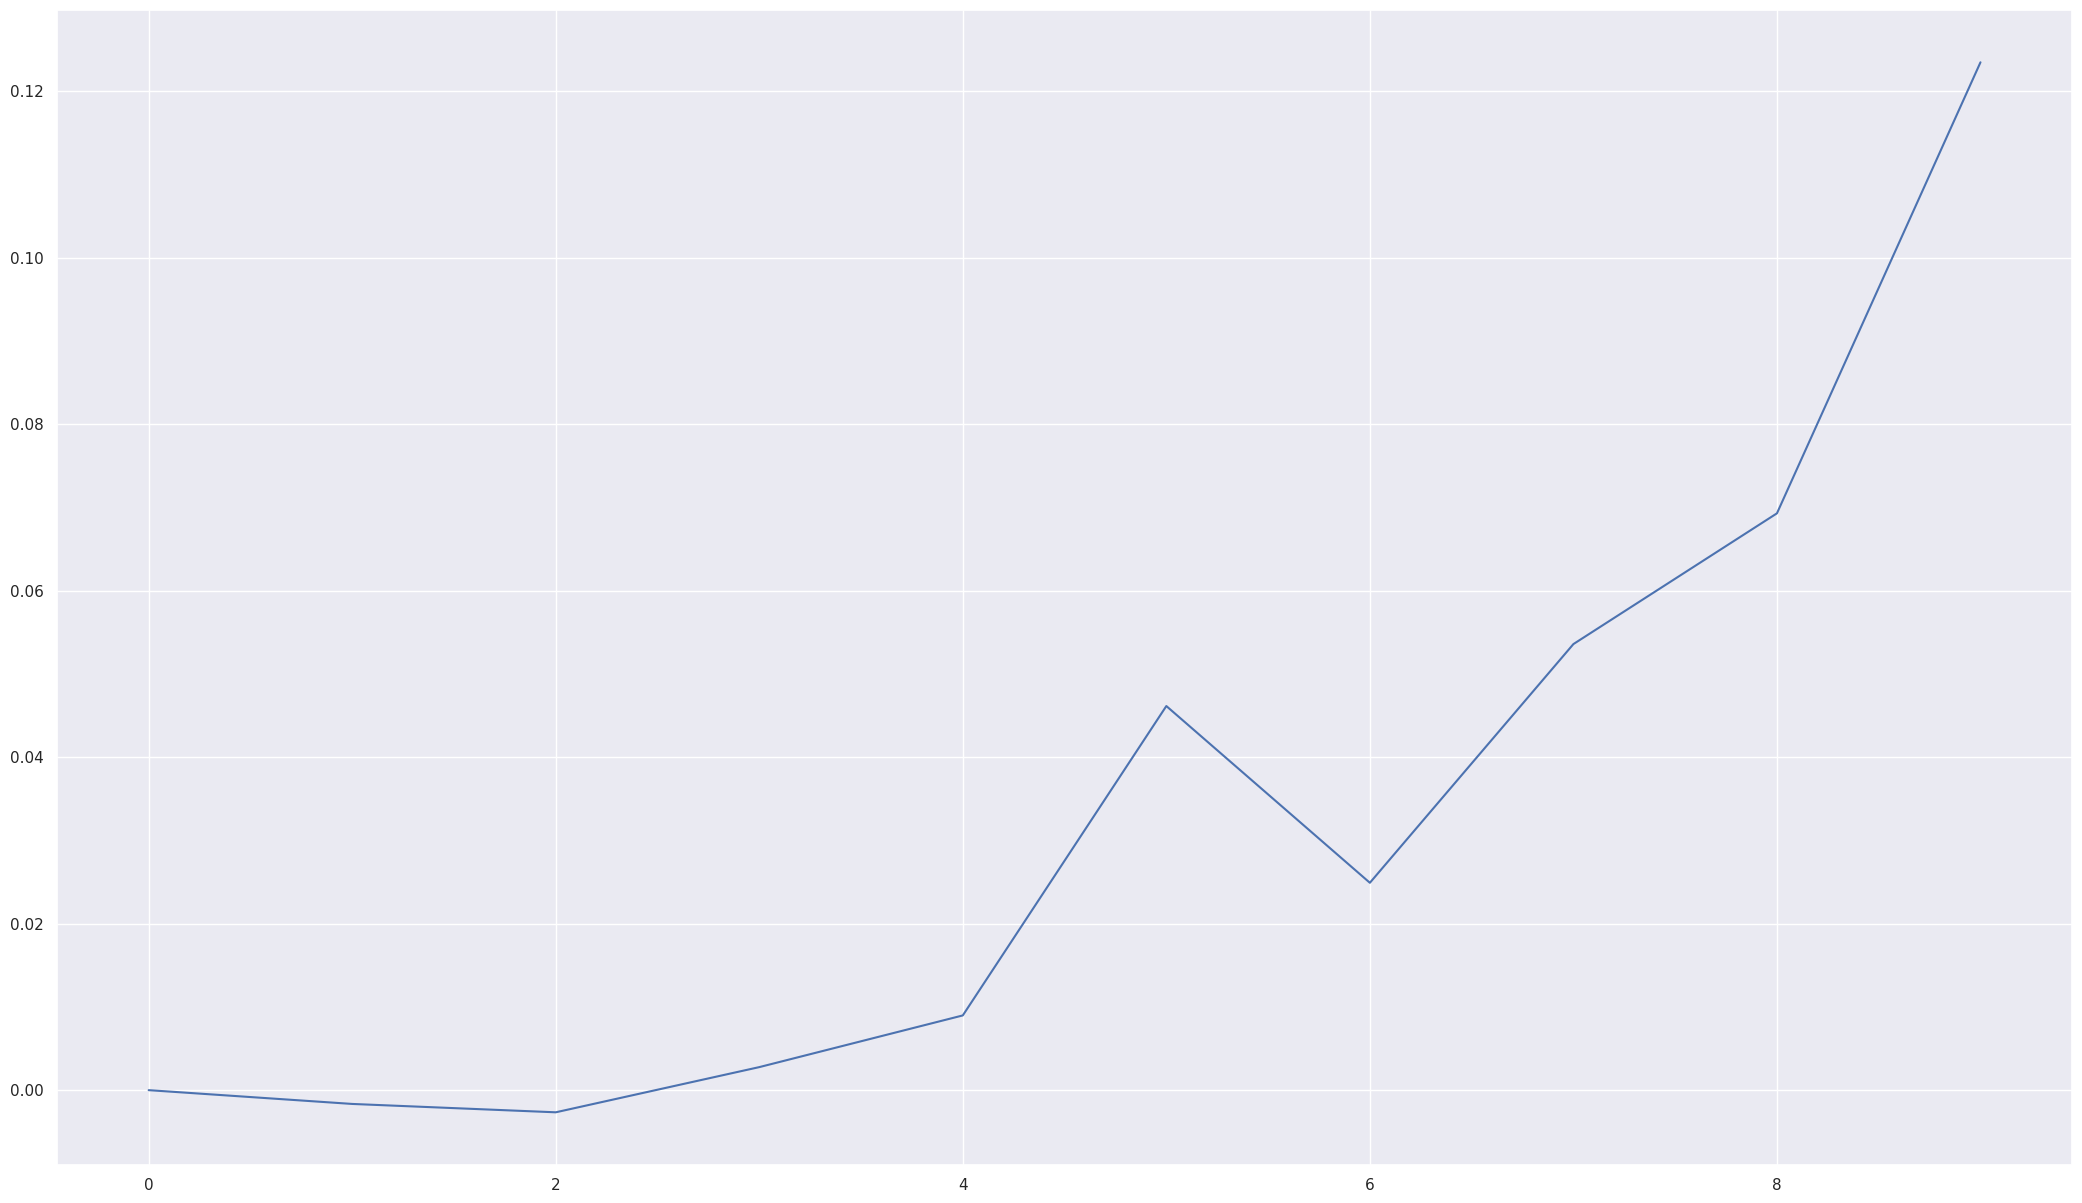

In [3]:
from numpy import average

losses = [betting_slip.loss for betting_slip in fund_history_summary.betting_slips.values()]
payouts = [betting_slip.payout_percentage for betting_slip in fund_history_summary.betting_slips.values()]

print(f"bet rate: {fund_history_summary.bet_rate}")
print(f"max losses: {max(losses)}")
print(f"min:{min(payouts)}")
print(f"max:{max(payouts)}")
print(f"avg:{average(payouts)}")

odds = []
payout_bet_count_dist = {}
for betting_slip in fund_history_summary.betting_slips.values():
    odds += [bet.odds for bet in betting_slip.bets if bet.win > 0]
    n_bets = len(betting_slip.bets)
    if n_bets not in payout_bet_count_dist:
        payout_bet_count_dist[n_bets] = {"total": betting_slip.payout_percentage, "n": 1}
    else:
        payout_bet_count_dist[n_bets]["total"] += betting_slip.payout_percentage
        payout_bet_count_dist[n_bets]["n"] += 1

for key in payout_bet_count_dist:
    if "total" in payout_bet_count_dist[key]:
        payout_bet_count_dist[key] = payout_bet_count_dist[key]["total"] / payout_bet_count_dist[key]["n"]

print(f"Average winning odds: {average(odds)}")
print(payout_bet_count_dist)
ax = sns.lineplot(data=payout_bet_count_dist)

## Real payout plotting

42.233999999999995


Text(0, 0.5, 'Wealth change in %')

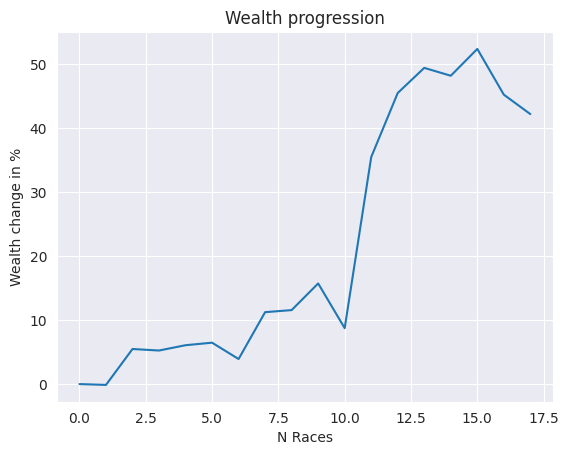

In [4]:
from numpy import cumsum
import seaborn as sns
real_payouts = [
    0,
    -0.133,
    5.619,
    -0.237,
    0.831,
    0.395,
    -2.556,
    7.330,
    0.324,
    4.169,
    -6.995,
    26.765,
    10.026,
    3.930,
    -1.231,
    4.196,
    -7.159,
    -3.040,
]

print(cumsum(real_payouts)[-1])

ax = sns.lineplot(cumsum(real_payouts))
ax.set_title("Wealth progression")
ax.set_xlabel("N Races")
ax.set_ylabel("Wealth change in %")

2.44359477124183